In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import eigh

import exact
import level_statistics as level_stat

# Comparing spectra

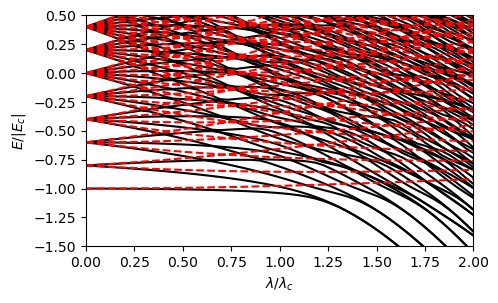

In [8]:
plt.rcParams['figure.figsize'] = (5, 3)

N = 10
N_photons_cutoff = 50

wc = 1
wz = 1 * wc
lamc = 0.5 * np.sqrt(wc * wz)
lams = lamc * np.linspace(0, 2, 50)


energies = []
for lam in lams:
    H = exact.dicke(wz, wc, lam, N/2, N_photons_cutoff)
    vals = eigh(H, eigvals_only=True)
    
    energies.append(vals / (N/2))

plt.plot(lams / lamc, energies, c='k')

energies = []
for lam in lams:
    H = exact.dicke_P2(wz, wc, lam, N/2, N_photons_cutoff)
    vals = eigh(H, eigvals_only=True)
    
    energies.append(vals / (N/2))

plt.plot(lams / lamc, energies, c='r', ls='dashed')

plt.ylabel(r'$E/|E_c|$')
plt.xlabel(r'$\lambda/\lambda_c$')
plt.xlim(0, 2)
plt.ylim(-1.5, 0.5)
plt.show()

# Tests with the regular Dicke model

In [4]:
plt.rcParams['figure.figsize'] = (5, 3)

N = 20
N_photons_cutoff = 50

wc = 1
wz = 1 * wc
lamc = 0.5 * np.sqrt(wc * wz)
lam = 0.2

P = level_stat.Peven(N/2, N_photons_cutoff)
H = exact.dicke(wz, wc, lam, N/2, N_photons_cutoff)
projected_H = P @ H @ P
trimed_H = level_stat.trim_hamiltonian(projected_H)
vals = eigh(trimed_H, eigvals_only=True)

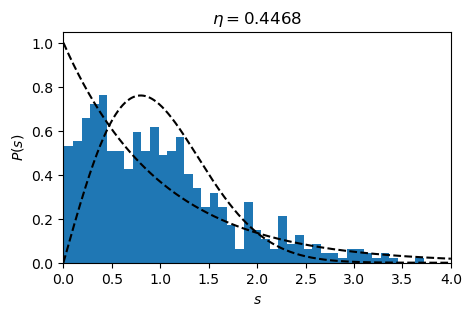

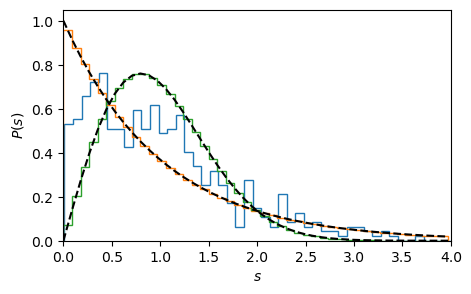

In [5]:
start = 0
end = -1
level_spacings = (vals[start+1:end] - vals[start:end-1])
renormalized_spacings = level_spacings / level_stat.moving_average(level_spacings, 50) # unfolding: i.e. adjust for underlying level_density


bins = 50
plt.hist(renormalized_spacings, bins=bins, density=True)
s = np.linspace(0, 4, 1000)
plt.plot(s, np.exp(-s), c='k', ls='dashed')
wigner = lambda s: 0.5*np.pi*s * np.exp(-0.25*np.pi*s**2)
plt.plot(s, wigner(s), c='k', ls='dashed')
plt.title(rf'$\eta = {round(level_stat.wigner_surmise_degree(renormalized_spacings, bins), 4)}$')
plt.ylabel(r'$P(s)$')
plt.xlabel(r'$s$')
plt.xlim(0, 4)
#plt.ylim(0, 2)
#plt.ylim(-1.5, -0.5)
plt.show()

counts, bin_edges = np.histogram(renormalized_spacings, bins=bins, density=True)
plt.stairs(counts, bin_edges)
ds = bin_edges[1] - bin_edges[0]
s = np.arange(0, 4, ds)
plt.plot(s, np.exp(-s), c='k', ls='dashed')
plt.stairs(np.exp(-(s[:-1] + ds/2)), s)

plt.plot(s, wigner(s), c='k', ls='dashed')
plt.stairs(wigner(s[:-1] + ds/2), s)
plt.ylabel(r'$P(s)$')
plt.xlabel(r'$s$')
plt.xlim(0, 4)
#plt.ylim(0, 2)
#plt.ylim(-1.5, -0.5)
plt.show()

# Tests with P2

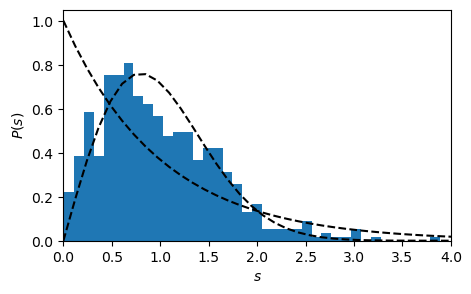

In [23]:
plt.rcParams['figure.figsize'] = (5, 3)

N = 20
N_photons_cutoff = 50

wc = 1
wz = 1 * wc
lamc = 0.5 * np.sqrt(wc * wz)
lam = 0.7

P = level_stat.Peven(N/2, N_photons_cutoff)

# H = dicke(wz, wc, lam, N/2, N_photons_cutoff)
# #H = P @ H @ P
# vals = eigh(H, eigvals_only=True)
# plt.plot(vals / (N/2), marker='o', lw=0)

H = exact.dicke_P2(wz, wc, lam, N/2, N_photons_cutoff)
projected_H = P @ H @ P
trimed_H = level_stat.trim_hamiltonian(projected_H)
vals = eigh(trimed_H, eigvals_only=True)

start = 0
end = -1
level_spacings = (vals[start+1:end] - vals[start:end-1])
renormalized_spacings = level_spacings / level_stat.moving_average(level_spacings, 50) # unfolding: i.e. adjust for underlying level_density


plt.hist(renormalized_spacings, bins=50, density=True)
s = np.linspace(0, 12, 100)
plt.plot(s, np.exp(-s), c='k', ls='dashed')
plt.plot(s, 0.5*np.pi*s * np.exp(-0.25*np.pi*s**2), c='k', ls='dashed')
plt.ylabel(r'$P(s)$')
plt.xlabel(r'$s$')
plt.xlim(0, 4)
#plt.ylim(0, 2)
#plt.ylim(-1.5, -0.5)
plt.show()

# Systematic testing

0.01 0.16283524904214552 0.16237569924607492 0.3831258680346021
0.01 0.16481391976800386 0.16237569924607492 0.3831258680346021
0.01 0.1680672268907563 0.16237569924607492 0.3831258680346021


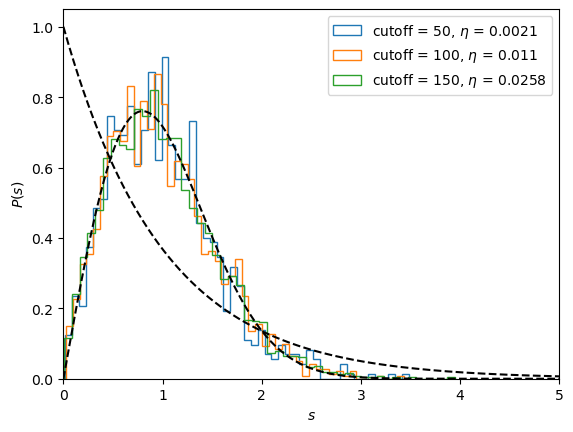

In [11]:
N = 40

wc = 1
wz = 1 * wc
lamc = 0.5 * np.sqrt(wc * wz)
lam = 0.8

N_cutoffs = [50, 100, 150]

for N_photons_cutoff in N_cutoffs:
    vals = np.load(f'data/spectra/sprectrum_dicke_{N}_{N_photons_cutoff}_{wc}_{wz}_{lam}.npy')
    
    start = 0
    end = -1
    level_spacings = (vals[start+1:end] - vals[start:end-1])
    renormalized_spacings = level_spacings / level_stat.moving_average(level_spacings, 50) # unfolding: i.e. adjust for underlying level_density
    
    eta = level_stat.wigner_surmise_degree(renormalized_spacings, bins=1000)
    
    plt.hist(renormalized_spacings, bins=50, density=True, histtype='step', label=f'cutoff = {N_photons_cutoff}, $\eta$ = {round(eta, 4)}')
    
s = np.linspace(0, 5, 1000)
plt.plot(s, np.exp(-s), c='k', ls='dashed')
wigner = lambda s: 0.5*np.pi*s * np.exp(-0.25*np.pi*s**2)
plt.plot(s, wigner(s), c='k', ls='dashed')
plt.ylabel(r'$P(s)$')
plt.xlabel(r'$s$')
plt.xlim(0, 5)
plt.legend()
#plt.ylim(0, 2)
#plt.ylim(-1.5, -0.5)
plt.show()

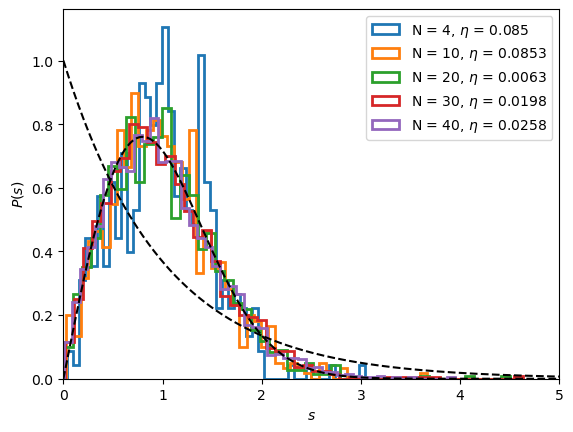

In [3]:
Ns = [4, 10, 20, 30, 40]

wc = 1
wz = 1 * wc
lamc = 0.5 * np.sqrt(wc * wz)
lam = 0.8

N_photons_cutoff = 150

for N in Ns:
    vals = np.load(f'data/spectra/sprectrum_dicke_{N}_{N_photons_cutoff}_{wc}_{wz}_{lam}.npy')
    
    start = 0
    end = -1
    level_spacings = (vals[start+1:end] - vals[start:end-1])
    renormalized_spacings = level_spacings / level_stat.moving_average(level_spacings, 50) # unfolding: i.e. adjust for underlying level_density
    
    eta = level_stat.wigner_surmise_degree(renormalized_spacings, bins=1000)
    
    plt.hist(renormalized_spacings, bins=50, density=True, histtype='step', label=f'N = {N}, $\eta$ = {round(eta, 4)}', lw=2)
    
s = np.linspace(0, 5, 1000)
plt.plot(s, np.exp(-s), c='k', ls='dashed')
wigner = lambda s: 0.5*np.pi*s * np.exp(-0.25*np.pi*s**2)
plt.plot(s, wigner(s), c='k', ls='dashed')
plt.ylabel(r'$P(s)$')
plt.xlabel(r'$s$')
plt.xlim(0, 5)
plt.legend()
#plt.ylim(0, 2)
#plt.ylim(-1.5, -0.5)
plt.show()

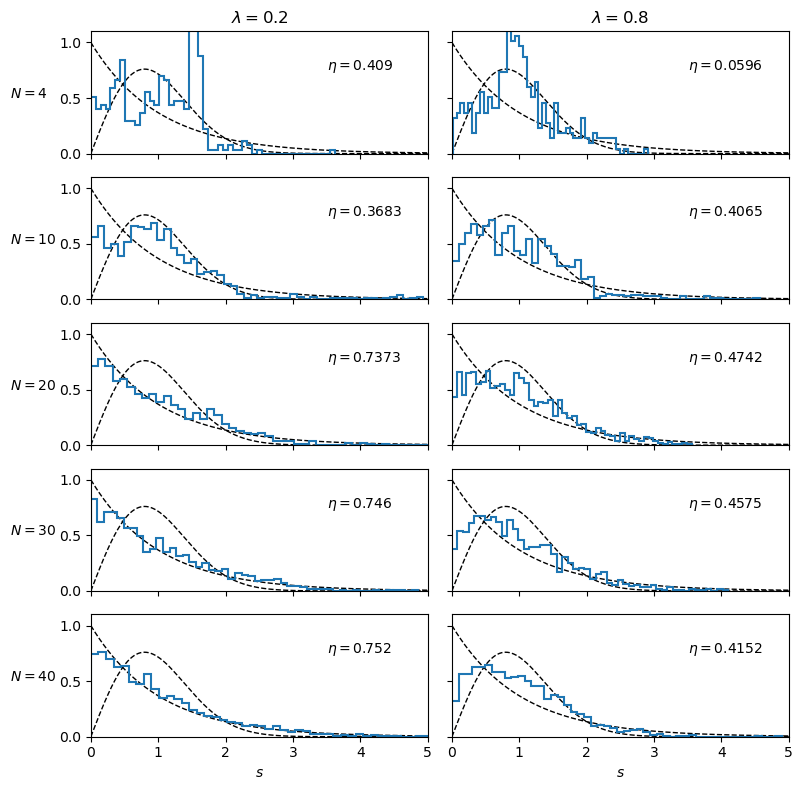

In [27]:
plt.rcParams['figure.figsize'] = (8, 8)

Ns = [4, 10, 20, 30, 40]

wc = 1
wz = 1 * wc
lamc = 0.5 * np.sqrt(wc * wz)
lams = [0.2, 0.8]

N_photons_cutoff = 150

fig, axes = plt.subplots(5, 2, sharey=True, sharex=True)

for i, N in enumerate(Ns):
    for j, lam in enumerate(lams):
        ax = axes[i, j]
        vals = np.load(f'data/spectra/sprectrum_dickeP2_{N}_{N_photons_cutoff}_{wc}_{wz}_{lam}.npy')
        
        start = 0
        end = -1
        level_spacings = (vals[start+1:end] - vals[start:end-1])
        renormalized_spacings = level_spacings / level_stat.moving_average(level_spacings, 50) # unfolding: i.e. adjust for underlying level_density
        
        eta = level_stat.wigner_surmise_degree(renormalized_spacings, bins=1000)
        
        s = np.linspace(0, 5, 1000)
        ax.plot(s, np.exp(-s), c='k', ls='dashed', lw=1)
        wigner = lambda s: 0.5*np.pi*s * np.exp(-0.25*np.pi*s**2)
        ax.plot(s, wigner(s), c='k', ls='dashed', lw=1)
        ax.hist(renormalized_spacings, bins=50, density=True, histtype='step', lw=1.5)
        
        ax.set_xlim(0, 5)
        ax.set_ylim(0, 1.1)
        
        ax.text(3.5, 0.75, rf'$\eta = {round(eta, 4)}$')
        
        if i == 0:
            ax.set_title(rf'$\lambda = {lam}$')
        
        if i == 4:
            ax.set_xlabel(r'$s$')
            
        if j == 0:
            ax.text(-1.2, 0.5, rf'$N = {N}$')

plt.tight_layout()
plt.show()

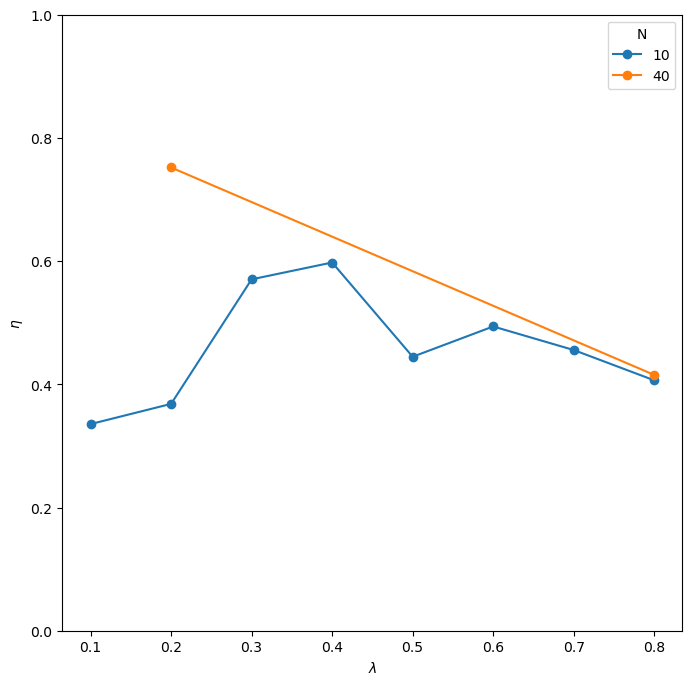

In [35]:
plt.rcParams['figure.figsize'] = (8, 8)

Ns = [10, 40]

wc = 1
wz = 1 * wc
lamc = 0.5 * np.sqrt(wc * wz)
lams = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

N_photons_cutoff = 150

for i, N in enumerate(Ns):
    etas = []
    true_lams = []
    for j, lam in enumerate(lams):
        try:
            vals = np.load(f'data/spectra/sprectrum_dicke_{N}_{N_photons_cutoff}_{wc}_{wz}_{lam}.npy')
            
            start = 0
            end = -1
            level_spacings = (vals[start+1:end] - vals[start:end-1])
            renormalized_spacings = level_spacings / level_stat.moving_average(level_spacings, 50) # unfolding: i.e. adjust for underlying level_density
            
            eta = level_stat.wigner_surmise_degree(renormalized_spacings, bins=1000)
            etas.append(eta)
            true_lams.append(lam)
        except FileNotFoundError:
            pass
        
    plt.plot(true_lams, etas, label=N, marker='o')

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\eta$')
plt.legend(title='N')
plt.ylim(0, 1)
plt.show()